In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
%matplotlib inline

In [2]:
# Loading data 
data = datasets.load_breast_cancer()
#print(data.DESCR)

In [3]:
# Splitting data into validation (0.2), test (0.8*0.2) & train sets (0.8*0.8)
Y = data.target
X = data.data

X_validation, X_t, Y_validation, Y_t = train_test_split(X, Y, test_size=0.80, random_state=42)
X_test, X_train, Y_test, Y_train = train_test_split(X_t, Y_t, test_size=0.80, random_state=42)

In [4]:
# Normalization of the data for features
scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

scaler1 = preprocessing.StandardScaler().fit(X_train)
X_train = scaler1.transform(X_train)

scaler2 = preprocessing.StandardScaler().fit(X_validation)
X_validation = scaler2.transform(X_validation)

In [5]:
ac_op = 1.0 # optimal rate of correct classification
ft_op = 0.0 # optimal rate of false true classification

# First metric - Euclidian 

def euclidian_norm(ft,ac):
    return (ft-ft_op)**2+(ac-ac_op)**2 

# Idea
To know how the SVM method behaves through the state space of parameters, we will evaluate three types of kernels in a grid build as param1 X param2:
    1. Gaussian: gamma related with standard deviation & C related with the level of error we can allow.
    2. Linear: 
    3. Polynomial:
    

# Gaussian Kernel
---

In [85]:
N = 20 # num of points per variable 
delta = 0.1
CMAX = 4.0
CMIN = 0.001
GAMMAMAX = 1.4
GAMMAMIN = 0.001

GAMMA = np.linspace(GAMMAMIN,GAMMAMAX,N)
C = np.linspace(CMIN,CMAX,N)

grid_ft = np.zeros((N,N)) # GAMMA vs C
grid_ac = np.zeros((N,N)) # GAMMA vs C

for i in range (0,N):
    for j in range (0,N):
        kernel_svc = svm.SVC(C=C[j], kernel='rbf', gamma=GAMMA[i])
        kernel_svc.fit(X_train,Y_train)
        Y_predict = kernel_svc.predict(X_test)
        MAT = confusion_matrix(Y_test, Y_predict)
        grid_ft[i][j] = MAT[1][0]/sum(sum(MAT))
        grid_ac[i][j] = (MAT[0][0]+MAT[1][1]) / sum(sum(MAT))

In [86]:
gaussian_norm = euclidian_norm(grid_ft,grid_ac)

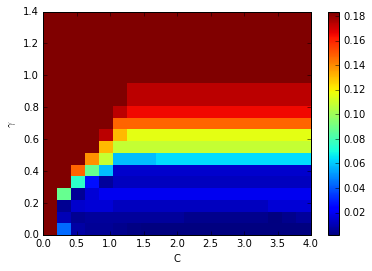

In [87]:
plt.clf()
plt.pcolormesh(C,GAMMA,gaussian_norm)
plt.ylabel('$\gamma$')
plt.xlabel('C')
plt.colorbar()

We can see that for small $\gamma$ and for almost all values of C greater than 0.5 the Euclidian metric is nearly zero. So let calculate the tf and correct classification for minimun:

In [88]:
# print the positions over the grid where metric has a minimun 
print('Minimun of the metric   ' + str(gaussian_norm.min()))
print('\nPositions where metrics has this value:   \n')
print(np.where(gaussian_norm == gaussian_norm.min()))

Minimun of the metric   0.00193213380027

Positions where metrics has this value:   

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))


In [91]:
# So let me choose the first (the lowest values of C & GAMMA)
print('optimal C is : '+ str(C[7]))
print('optimal GAMMA is : '+ str(GAMMA[7]))
kernel_svc = svm.SVC(C=C[7], kernel='rbf', gamma=GAMMA[0])
kernel_svc.fit(X_train,Y_train)
Y_predict = kernel_svc.predict(X_test)
MAT = confusion_matrix(Y_test, Y_predict)
FT_G = MAT[1][0]/sum(sum(MAT))
CORRECT_G = (MAT[0][0] + MAT[1][1]) / sum(sum(MAT))
TF_G = MAT[0][1] / sum(sum(MAT))
print('\nmetric : ' +str(euclidian_norm(FT_G,CORRECT_G)))
print('FT : ' + str(FT_G*100)+' %')
print('Correct : ' + str(CORRECT_G*100)+' %')
print('TF : ' + str(TF_G *100)+' %')

optimal C is : 1.47431578947
optimal GAMMA is : 0.516421052632

metric : 0.00193213380027
FT : 0.0 %
Correct : 95.6043956044 %
TF : 4.3956043956 %


# Lineal Kernel
---

In [105]:
N = 100 # num of points per variable 
CMAX = 4.0
CMIN = 0.001

C = np.linspace(CMIN,CMAX,N)

grid_ft = np.zeros(N) 
grid_ac = np.zeros(N) 

for i in range (0,N):
    linear_svc = svm.SVC(C=C[i], kernel='linear')
    linear_svc.fit(X_train,Y_train)
    Y_predict = kernel_svc.predict(X_test)
    MAT = confusion_matrix(Y_test, Y_predict)
    grid_ft[i] = MAT[1][0]/sum(sum(MAT))
    grid_ac[i] = (MAT[0][0]+MAT[1][1]) / sum(sum(MAT))

In [106]:
linear_norm = euclidian_norm(grid_ft,grid_ac)

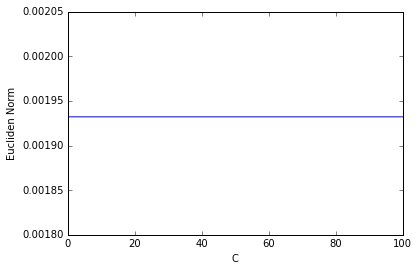

In [117]:
plt.plot(C,linear_norm)
plt.ylabel('Eucliden Norm')
plt.xlabel('C')

We can see that for all values of C the Euclidian metric has the same value. So let calculate the tf and correct classification for minimun:

In [122]:
# print the positions over the grid where metric has a minimun 
print('Minimun of the metric   ' + str(linear_norm.min()))
print('\nPositions where metrics has this value:   \n')
print(np.where(linear_norm == linear_norm.min()))

Minimun of the metric   0.00193213380027

Positions where metrics has this value:   

(array([   0,    1,    2, ..., 9997, 9998, 9999]),)


In [126]:
print('optimal C is : '+ str(C[1]))
linear_svc = svm.SVC(C=C[1], kernel='linear')
kernel_svc.fit(X_train,Y_train)
Y_predict = kernel_svc.predict(X_test)
MAT = confusion_matrix(Y_test, Y_predict)
FT_L = MAT[1][0]/sum(sum(MAT))
CORRECT_L = (MAT[0][0] + MAT[1][1]) / sum(sum(MAT))
TF_L = MAT[0][1] / sum(sum(MAT))
print('\nmetric : ' +str(euclidian_norm(FT_L,CORRECT_L)))
print('FT : ' + str(FT_L*100)+' %')
print('Correct : ' + str(CORRECT_L*100)+' %')
print('TF : ' + str(TF_L *100)+' %')

optimal C is : 0.0100109990999

metric : 0.00193213380027
FT : 0.0 %
Correct : 95.6043956044 %
TF : 4.3956043956 %


# Polynomial
---

In [162]:
N = 100 # num of points per variable 
CMAX = 5.0
CMIN = 0.001
DMIN = 1
DMAX = 15
DN = 50
C = np.linspace(CMIN,CMAX,N)
D = np.linspace(DMIN,DMAX,DN)

grid_ft = np.zeros((N,DN)) 
grid_ac = np.zeros((N,DN)) 

for i in range (0,N):
    for j in range (0,DN):
        kernel_svc = svm.SVC(C=C[i], kernel='poly', degree=D[j])
        kernel_svc.fit(X_train,Y_train)
        Y_predict = kernel_svc.predict(X_test)
        MAT = confusion_matrix(Y_test, Y_predict)
        grid_ft[i][j] = MAT[1][0]/sum(sum(MAT))
        grid_ac[i][j] = (MAT[0][0]+MAT[1][1]) / sum(sum(MAT))

In [163]:
poly_norm = euclidian_norm(grid_ft,grid_ac)

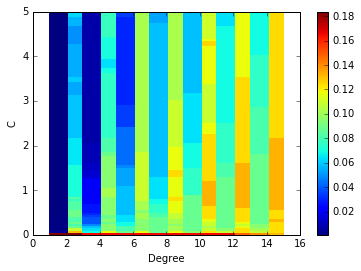

In [164]:
plt.clf()
plt.pcolormesh(D,C,poly_norm)
plt.ylabel('C')
plt.xlabel('Degree')
plt.colorbar()

We can see that for small Degree of polynomial and for almost all values of C greater the Euclidian metric is nearly zero. So let calculate the tf and correct classification for minimun:

In [165]:
# print the positions over the grid where metric has a minimun 
print('Minimun of the metric   ' + str(poly_norm.min()))
print('\nPositions where metrics has this value:   \n')
print(np.where(poly_norm == poly_norm.min()))

Minimun of the metric   0.00108682526265

Positions where metrics has this value:   

(array([ 7,  7,  7,  7,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 12,
       12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16,
       16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20,
       20, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24,
       25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28, 29,
       29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 32, 32, 32, 32, 33, 33,
       33, 33, 34, 34, 34, 34, 35, 35, 35, 35, 36, 36, 36, 36, 37, 37, 37,
       37, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41,
       42, 42, 42, 42, 43, 43, 43, 43, 44, 44, 44, 44, 45, 45, 45, 45, 46,
       46, 46, 46, 47, 47, 47, 47, 48, 48, 48, 48, 49, 49, 49, 49, 50, 50,
       50, 50, 51, 51, 51, 51, 52, 52, 52, 52, 53, 53, 53, 53, 54, 54, 54,
       54, 55, 55, 55, 55, 56, 56, 56, 56, 57, 57, 57, 57, 58, 58, 58, 58,
       59, 59

In [166]:
# So let me choose the first (the lowest values of C & GAMMA)
print('optimal C is : '+ str(C[7]))
print('optimal Degree is : '+ str(D[0]))
kernel_svc = svm.SVC(C=C[7], kernel='poly', degree=D[0])
kernel_svc.fit(X_train,Y_train)
Y_predict = kernel_svc.predict(X_test)
MAT = confusion_matrix(Y_test, Y_predict)
FT_P = MAT[1][0]/sum(sum(MAT))
CORRECT_P = (MAT[0][0] + MAT[1][1]) / sum(sum(MAT))
TF_P = MAT[0][1] / sum(sum(MAT))
print('\nmetric : ' +str(euclidian_norm(FT_P,CORRECT_P)))
print('FT : ' + str(FT_P*100)+' %')
print('Correct : ' + str(CORRECT_P*100)+' %')
print('TF : ' + str(TF_P *100)+' %')

optimal C is : 0.354464646465
optimal Degree is : 1.0

metric : 0.00108682526265
FT : 0.0 %
Correct : 96.7032967033 %
TF : 3.2967032967 %
